In [1]:
#yha hmne data ko import kiya
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\dell\Downloads\datasetsandcodefilesstockmarketprediction\tesla.csv")
df.head()     #sare head show ho jaaenge


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [2]:
# info will give total rows and coloum and its data type...also chk if there is any nul value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [3]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\dell\AppData\Local\Temp\ipykernel_848\3023999556.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [4]:
print(f'date contain stock prices btw  {df.Date.min()} {df.Date.max()}')   #this shows hmare data ki date ki range kya h 
print(f'total days= {(df.Date.max()-df.Date.min()).days} days')    #this shows range of days

date contain stock prices btw  2010-06-29 00:00:00 2019-03-15 00:00:00
total days= 3181 days


In [5]:
#describe fuction will give following detail free mai
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

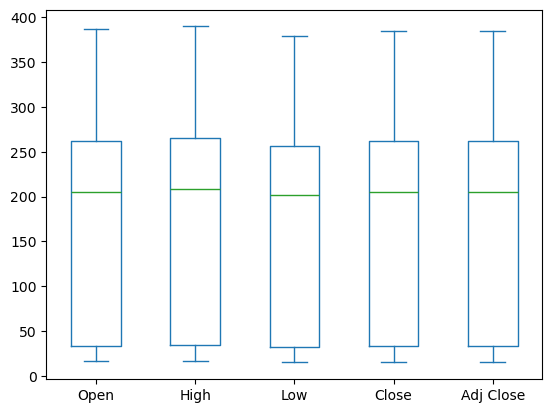

In [6]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [7]:
#setting the layout for our plot 
#!pip install chart_studio

import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


layout=go.Layout(title='TESLA STOCK PRICE',xaxis=dict(title='Date',titlefont=dict(family='courier new ,monospace',size=18,color='red')),yaxis=dict(title='Price',titlefont=dict(family='courier new,monospace',size=18,color='blue'),dtick=50))

tesla_data=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

C:\Users\dell\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



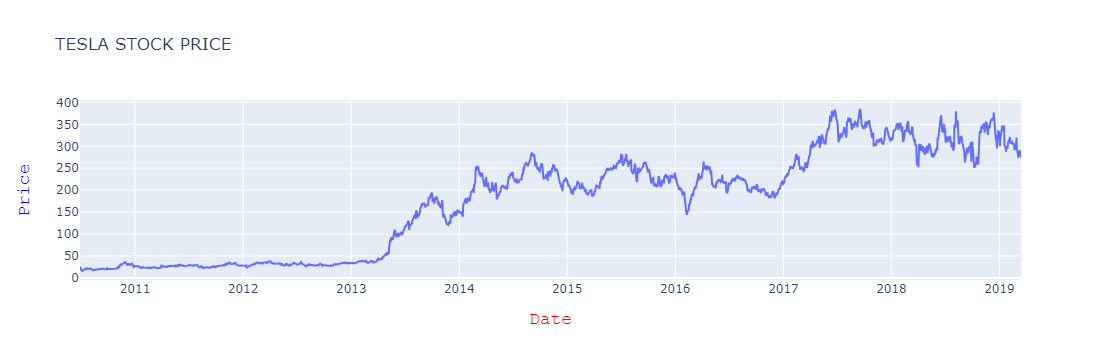

In [8]:
#ploting
iplot(plot)

In [9]:
#building regression model
import numpy as np
from sklearn.model_selection import train_test_split

#data ko split krenge
x=np.array(df.index).reshape(-1,1)

y=df['Close']
#x=df.iloc[:,:-1]
#y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [10]:
#applying scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
x=s.fit_transform(x)
x

array([[-1.73126118],
       [-1.72968156],
       [-1.72810194],
       ...,
       [ 1.72810194],
       [ 1.72968156],
       [ 1.73126118]])

In [11]:
# creating linear reg model

from sklearn.linear_model import LinearRegression
l= LinearRegression()
l.fit(x_train,y_train)



LinearRegression()

In [12]:
#decision treee regresor  as we have target varable as continoues
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5)            # koi bhi parameter yha dena h (max_dept)
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))                #classification model m accuracy score nikalte and regression mai hm r2


0.9769308140921845


In [13]:
#applyling loggostic reg......yha yeh nhi lge ka because yeh regression data h havingcontinous variable LR is ment for classification data

#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression()
#classifier.fit(x_train,y_train)
#y_pred=classifier.predict(x_test)
#print(y_pred,y_test)

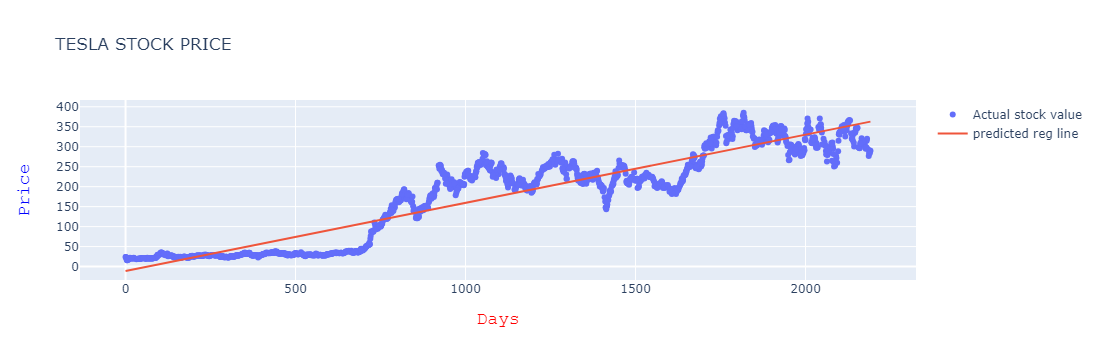

In [14]:
#plot actual and predict values for train data set
trace0=go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual stock value'
)

trace1=go.Scatter(
    x=x_train.T[0],
    y=l.predict(x_train).T,
    mode='lines',
    name='predicted reg line'
)
df=[trace0,trace1]
layout.xaxis.title.text='Days'
plot2=go.Figure(data=df,layout=layout)
iplot(plot2)
    


In [15]:
#confusion matrix with precision.....machine kitne value sahi bta rhe h out of total pred values....recallmatric
from sklearn.metrics import confusion_matrix,precision_score,recall_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))        #recall matrix actual true +ve maisai machine kitne sahi bta rhe h

ValueError: continuous is not supported